# Resolving the whole process of plant essential oil dataset
## Load the required packages 

In [2]:
import torch
import seaborn
seaborn.set_context(context="talk")
from GCMSFormer.GCMSformer import train_model, evaluate_model, check_model, plot_loss, make_model
from GCMSFormer.da import gen_datasets
import pickle
from GCMSFormer.Resolution import Resolution, output_msp
from GCMSFormer.Alignment import Alignment
import time
import os
from GCMSFormer.NetCDF import netcdf_reader  
import pandas as pd

## Load the Library

In [3]:
with open('Library/tgt_vacob.pk', 'rb') as file_1:
     tgt_vacob = pickle.load(file_1)

## Load GCMSFormer model 

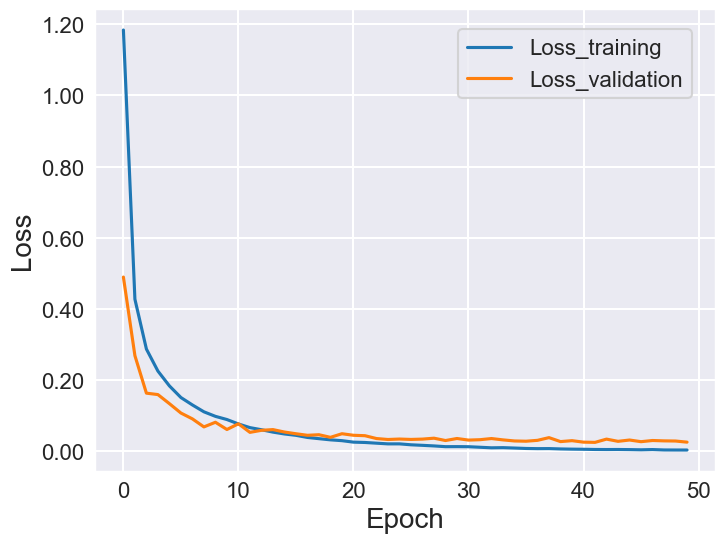

In [12]:
model_path='./model'
model_name='model_GCMSFormer'
loss_name='loss.pt'
mz_range = (1, 1000)
if check_model(model_path + '/' + model_name, model_path + '/' + loss_name):
    # load model
    m_state_dict = torch.load(model_path + '/' + model_name + '.pt')
    model = make_model(len(tgt_vacob), N=7, d_model=1000, d_ff=1024, h=8, dropout=0.1)
    model.load_state_dict(m_state_dict)
    # load loss
    with open(model_path + '/' + loss_name, 'rb') as file_1:
         loss = pickle.load(file_1)
    plot_loss(loss)
    print('yyy')
# else:
#     para = {'name': 'Library/spectra.msp',
#                     'mz_range': mz_range,
#                     'aug_num': 30000,
#                     'layer_num': 7,
#                     'batch': 20,
#                     'epoch': 50,
#                     'lr': 0.0001,
#                     'head': 8,
#                     'model_path': '../model',
#                     'model_name': model_name,
#                     'loss_name': loss_name}
#     # Generating Dataset
#     TRAIN, VALID, TEST, tgt_vacob = gen_datasets(para)
#     # Train model
#     model, Loss = train_model(para,TRAIN, VALID, tgt_vacob)
#     plot_loss(Loss)
#     # Test model
#     score=evaluate_model(model,TEST,tgt_vacob,int(max(para['mz_range'])))

In [ ]:
model_name='model_GCMSFormer'
loss_name='loss.pt'
mz_range = (1, 1000)
# load model
m_state_dict = torch.load(model_path + '/' + model_name + '.pt')
model = make_model(len(tgt_vacob), N=7, d_model=1000, d_ff=1024, h=8, dropout=0.1)
model.load_state_dict(m_state_dict)
# load loss
with open(model_path + '/' + loss_name, 'rb') as file_1:
     loss = pickle.load(file_1)
plot_loss(loss)
print('yyy')

In [13]:
import matplotlib.pyplot as plt
import torch
import seaborn

seaborn.set_context(context="talk")
from GCMSFormer.GCMSformer import plot_loss, make_model
from GCMSFormer.Alignment import Alignment
import pickle
from GCMSFormer.Resolution import Resolution, output_msp
import time
import os
import pandas as pd


# Load the Library
with open('D:\\pythonProject\\transformer\\Transformer-1\\GCMSFORMER\\Library\\tgt_vacob.pk', 'rb') as file_1:
    # pk文件 ——> 采用了‘rb’方式去以二进制方式打开文件，然后再用pickle库去读数据就可以顺利读出数据文件了
    tgt_vacob = pickle.load(file_1)


model_path = './model'
model_name = 'model_GCMSFormer'
loss_name = 'loss'
mz_range = (1, 1000)

model = make_model(tgt_vacob, N=7, d_model=1000, d_ff=1024, h=8, dropout=0.1)  # 初始化模型架构
m_state_dict = torch.load(model_path + '/' + model_name + '.pt')  # 加载原始模型训练好的不带模型结构的模型参数
model.load_state_dict(m_state_dict)  # 将模型参数导入初始化的模型架构里
# load loss
with open(model_path + '/' + loss_name + '.pk', 'rb') as file_1:
    loss = pickle.load(file_1)
plot_loss(loss)  # 绘制loss曲线

# Test GCMSFORMER
devices = torch.device('cpu')
model = model.to(devices)  # 使用模型的时候搬到cpu上
start = time.time()
path = 'D:/pythonProject/transformer/Transformer-1/data'
files = os.listdir(path)

df0, N0 = Alignment(path, files[0:5], model, tgt_vacob.to(devices), devices)
df0.to_csv(path + '/' + 'SetⅠ.csv', index=False)

end = time.time()  # 返回自那一刻以来的秒数
print("Running time: %.2fs" % (end - start))

plt.show()

1.0.CDF: 100%|██████████| 22/22 [00:13<00:00,  1.66it/s]

Running time: 76.61s


## GCMSFormer resolution of plant essential oil datasets

In [4]:
# Test GCMSFormer
devices = torch.device('cpu')
model = model.to(devices)
start = time.time()
path = '../data'
files = os.listdir(path)
Alignment_or_not = True
if Alignment_or_not:
    # Set Ⅰ
    df0, N0 = Alignment(path,files[0:5],model,tgt_vacob.to(devices),devices)
    df0.to_csv(path + '/' + 'SetⅠ.csv', index=False)
    # Set Ⅱ
    df1, N1 = Alignment(path,files[5:10],model,tgt_vacob.to(devices),devices)
    df1.to_csv(path + '/' + 'SetⅡ.csv', index=False)
else:
    for filename in files:
            ncr = netcdf_reader(path + '/' + filename, True)
            sta_S, area, rt, R2 = Resolution(path,filename,model,tgt_vacob.to(devices),devices)
            msp = filename.split('.CDF')[0] + '.MSP'
            output_msp(path + '/'+ msp, sta_S, rt)
            csv = filename.split('.CDF')[0] + '.csv'
            df = pd.DataFrame({'rt': rt, 'area': area, 'R2': R2})
            df.to_csv(path + '/' + csv, index = False)
end = time.time()
print("Running time: %.2fs"%(end - start))

2-1.0.CDF: 100%|███████████████████████████████████████████████████████████████████████| 38/38 [00:22<00:00,  1.66it/s]


Running time: 210.67s
